### Libraries

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import pandas as pd

sns.set_theme()

### Linear regression

In [3]:
data = pd.read_csv('real_estate_price_size.csv')
data.describe()

,price,size
count,100.000000,100.000000
mean,292289.470160,853.024200
std,77051.727525,297.941951
min,154282.128000,479.750000
25%,234280.148000,643.330000
50%,280590.716000,696.405000
75%,335723.696000,1029.322500
max,500681.128000,1842.510000


In [7]:
y = data['price']
x1 = data['size']
x = sm.add_constant(x1)
result = sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Sat, 13 Jul 2024   Prob (F-statistic):           8.13e-31
Time:                        15:32:57   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e+05   1.19e+04      8.550      0.000    7.83e+04    1.26e+05
size         223.1787     13.199     16.909      0.000     196.986     249.371
==============================================================================
Omnibus:                        6.262   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.938
Skew:                           0.117   Prob(JB):                        0.230
Kurtosis:                       2.194   Cond. No.                     2.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

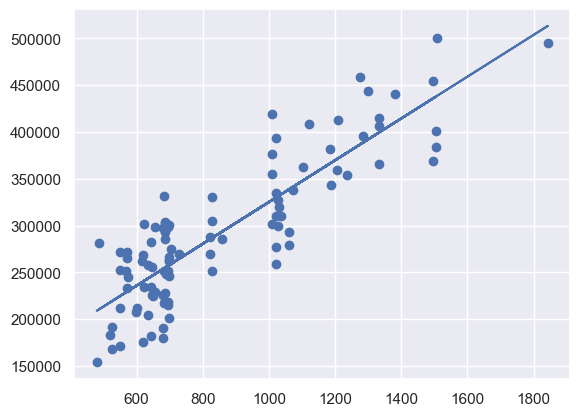

In [9]:
plt.scatter(x1,y)
plt.plot(x1, 101900 + 223.1787*x1)

### Multiple linear regression

In [10]:
data = pd.read_csv('real_estate_price_size_year.csv')
data.describe()

,price,size,year
count,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000
std,77051.727525,297.941951,4.729021
min,154282.128000,479.750000,2006.000000
25%,234280.148000,643.330000,2009.000000
50%,280590.716000,696.405000,2015.000000
75%,335723.696000,1029.322500,2018.000000
max,500681.128000,1842.510000,2018.000000


In [11]:
y = data['price']
x1 = data[['size', 'year']]
x = sm.add_constant(x1)
result = sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     168.5
Date:                Sat, 13 Jul 2024   Prob (F-statistic):           2.77e-32
Time:                        15:37:22   Log-Likelihood:                -1191.7
No. Observations:                 100   AIC:                             2389.
Df Residuals:                      97   BIC:                             2397.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.772e+06   1.58e+06     -3.647      0.000   -8.91e+06   -2.63e+06
size         227.7009     12.474     18.254      0.000     202.943     252.458
year        2916.7853    785.896      3.711      0.000    1357.000    4476.571
==============================================================================
Omnibus:                       10.083   Durbin-Watson:                   2.250
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                3.678
Skew:                           0.095   Prob(JB):                        0.159
Kurtosis:                       2.080   Cond. No.                     9.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Dummy variable

In [17]:
raw_data = pd.read_csv('real_estate_price_size_year_view.csv')
data = raw_data.copy()
data['view'] = data['view'].map({'Sea view':1, 'No sea view':0})
data.describe()

,price,size,year,view
count,100.000000,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000,0.490000
std,77051.727525,297.941951,4.729021,0.502418
min,154282.128000,479.750000,2006.000000,0.000000
25%,234280.148000,643.330000,2009.000000,0.000000
50%,280590.716000,696.405000,2015.000000,0.000000
75%,335723.696000,1029.322500,2018.000000,1.000000
max,500681.128000,1842.510000,2018.000000,1.000000


In [18]:
y = data['price']
x1 = data[['size', 'year', 'view']]
x = sm.add_constant(x1)
result = sm.OLS(y, x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     335.2
Date:                Sat, 13 Jul 2024   Prob (F-statistic):           1.02e-50
Time:                        16:20:31   Log-Likelihood:                -1144.6
No. Observations:                 100   AIC:                             2297.
Df Residuals:                      96   BIC:                             2308.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.398e+06   9.94e+05     -5.431      0.000   -7.37e+06   -3.43e+06
size         223.0316      7.838     28.455      0.000     207.473     238.590
year        2718.9489    493.502      5.510      0.000    1739.356    3698.542
view        5.673e+04   4627.695     12.258      0.000    4.75e+04    6.59e+04
==============================================================================
Omnibus:                       29.224   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.957
Skew:                           1.088   Prob(JB):                     7.85e-15
Kurtosis:                       6.295   Cond. No.                     9.42e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""